In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')

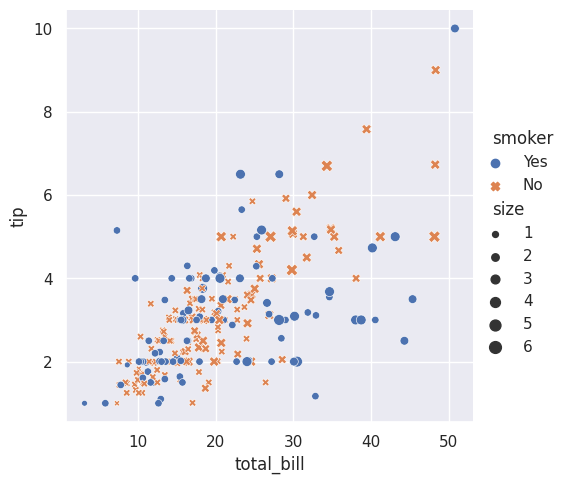

In [ ]:
sns.set_theme()
sns.relplot(data=tips, x='total_bill',y='tip',hue='smoker',style='smoker',size='size')
plt.show()

In [ ]:
tips.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

1. 평균팁
2. 요일별 평균 팁
3. 점심/저녁의 팁 평균
4. 흡연자 비율
5. 성별 흡연 여부에 따른 평균
6. 총 결제금액을 기준으로 내림차순 정렬
7. 식당이 주에 몇일 영업하는지 추출
8. 총 결제금액을 3등분하여 'low','medium','high'으로 나누고 평균 팁
9. 총 결제금액별 tip 평균

1. 평균팁

In [ ]:
avg_tip = tips['tip'].mean()
avg_tip

2.99827868852459

2. 요일별 평균 팁
- ~ 별일때 문법은 groupby(~)[뒤에 붙는거]

In [ ]:
avg_tip_day = tips.groupby('day')['tip'].mean()
avg_tip_day

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

3. 점심/저녁의 팁 평균

In [ ]:
avg_tip_time = tips.groupby('time')['tip'].mean()
avg_tip_time

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

4. 흡연자 비율
- value_counts는 값의 개수를 센다.
- 여기서는 YES를 세면 흡연자의 수가 나올것이고 비율이니까 계산한다.

In [ ]:
smoker_counts = tips['smoker'].value_counts()
smoker_counts

No     151
Yes     93
Name: smoker, dtype: int64

In [ ]:
smoker_ratio = smoker_count[1]/(smoker_count[0] + smoker_count[1])
smoker_ratio

0.38114754098360654

5. 성별 흡연 여부에 따른 평균

In [ ]:
avg_gender_smoker = tips.groupby(['sex', 'smoker'])['tip'].mean()
avg_gender_smoker

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

6. 총 결제금액을 기준으로 내림차순 정렬

In [ ]:
sorted_tips = tips['total_bill'].sort_values(ascending=False)
sorted_tips

170    50.81
212    48.33
59     48.27
156    48.17
182    45.35
       ...  
149     7.51
111     7.25
172     7.25
92      5.75
67      3.07
Name: total_bill, Length: 244, dtype: float64

7. 식당이 주에 몇일 영업하는지 추출

In [ ]:
work = tips['day'].unique()
len(work)

4

8. 총 결제금액을 3등분하여 'low','medium','high'으로 나누고 평균 팁

In [ ]:
tips['total_bill_category'] = pd.qcut(tips['total_bill'], q=3, labels=['low', 'medium', 'high'])
avg_tip_by_bill_category = tips.groupby('total_bill_category')['tip'].mean()
print(avg_tip_by_bill_category)

total_bill_category
low       2.049634
medium    2.894815
high      4.062099
Name: tip, dtype: float64


9. 총 결제금액별 tip 평균
- ~ 별이니까 (총결제금액)[팁].평균

In [41]:
avg_tip_by_total_bill = tips.groupby('total_bill')['tip'].mean()
avg_tip_by_total_bill

total_bill
3.07      1.000
5.75      1.000
7.25      3.075
7.51      2.000
7.56      1.440
          ...  
45.35     3.500
48.17     5.000
48.27     6.730
48.33     9.000
50.81    10.000
Name: tip, Length: 229, dtype: float64

## seaborn 시각화 패키지
- relation plots : 두 변수의 관계를 나타낼 때 사용
- relplot, scatterplot, lineplot
- categorical plots : 범주형 데이터를 대상으로 할 때 사용
- catplot, stripplot, swarmplot, boxplot, violinplot, boxenplot, pointplot, - - - barplot, countplot
- distribution plots : 변수들의 분포를 나타낼 때 사용
- hisplot, kdeplot, ecdfplot, rugplot, distplot
- regression plots : 회귀분석 결과를 나타내는 시각화
- Implot, regplot, residplot
- matrix plots : 변수 간의 관계 정도를 매트릭스로 만들고 색을 입힐 때 사용
- heatmap, clustermap
- multi-plot grids : 여러 그래프를 한번에 나타낼 때
- FacetGrid, pairplot, PairGrid, jointplot, JointGrid